<h1 align='center'>Support Vector Machines with Scikit-learn</h1>


* SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. 
* It is known for its kernel trick to handle nonlinear input spaces[when Data is not Separable]. 
* If your data is Separable then we called it is Linear Spaces.
* Given a set of training examples, each marked as belonging to `one or the other of two categories`, an `SVM training algorithm` builds a model that assigns new examples to one category or the other, making it a `non-probabilistic binary linear classifier` (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting).
* An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. 

It is used in a variety of `applications` such as 

1. Face detection, 
2. Intrusion detection, 
3. Classification of emails, 
4. News articles and web pages, 
5. Classification of genes, and 
6. Handwriting recognition.

SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a **discriminative classifier**. SVM finds an optimal hyperplane which helps in classifying new data points.

**Support Vector Machines**

* Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. 
* It can easily handle **multiple continuous(Numerical Data) and categorical variables(Descrete)**. 
* SVM constructs a `hyperplane in multidimensional space` to separate different classes.
* SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. 
* `The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes`.
<h1 align=center >or </h1>
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

![](Images/svm.png)

Suppose you are given plot of `two label classes` on graph as shown in image (A). 

Can you decide a separating line for the classes?
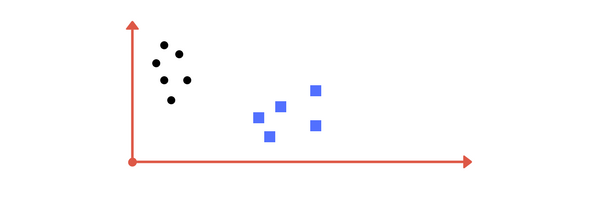


B). It fairly separates the two classes. Any point that is left of line falls into black circle class and on right falls into blue square class. Separation of classes. That’s what SVM does. It finds out a line/ hyper-plane (in multidimensional space that separate outs classes). Shortly, we shall discuss why I wrote multidimensional space.
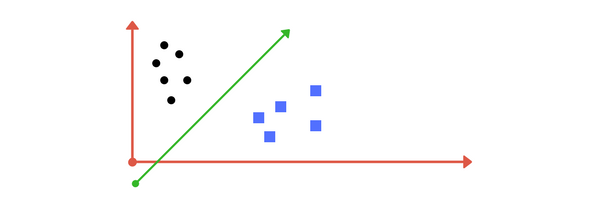

1. **Bit Complex**

So far so good. Now consider what if we had data as shown in image below? Clearly, there is no line that can separate the two classes in this x-y plane. So what do we do? We apply transformation and add one more dimension as we call it z-axis. Lets assume value of points on z plane, w = x² + y². In this case we can manipulate it as distance of point from z-origin. Now if we plot in z-axis, a clear separation is visible and a line can be drawn .

Can you draw a separating line in this plane?

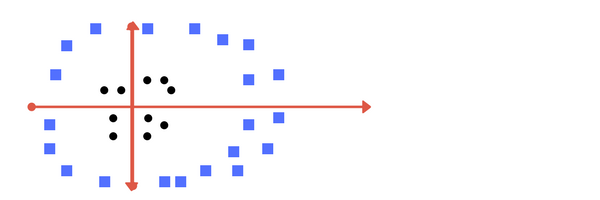


plot of zy axis. A separation can be made here.
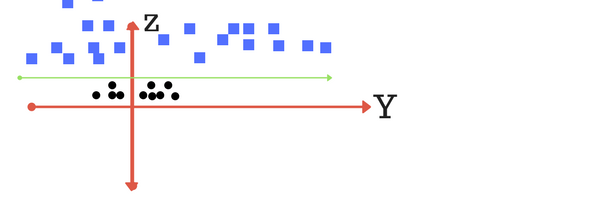

When we transform back this line to original plane, it maps to circular boundary as shown in image E. These transformations are called kernels.

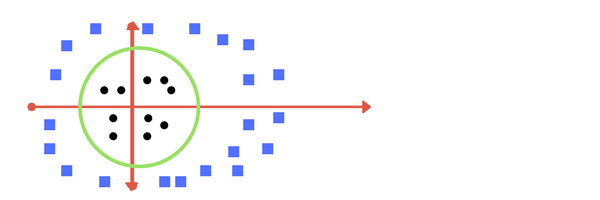
Transforming back to x-y plane, a line transforms to circle.


![](https://miro.medium.com/max/1200/0*iDZMC0LsciIANcYv.gif)


**Basic SVM**

In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
X = [[0, 0,0], [1, 1,-1]]
y = [0, 1]

In [2]:
clf = svm.SVC(gamma='auto')
clf.fit(X, y)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [3]:
clf.predict([[1,0,1]])

array([0])

In [4]:
# get support vectors
clf.support_vectors_

array([[ 0.,  0.,  0.],
       [ 1.,  1., -1.]])

In [5]:
# get indices of support vectors
clf.support_ 

array([0, 1])

In [6]:
# get number of support vectors for each class
clf.n_support_ 

array([1, 1])

# **SVM: Maximum margin separating hyperplane**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [13]:
# we create 40 separable points
X, y = make_blobs(n_samples=40,centers=2,random_state=6)
X.mean()

0.5492554089596565

In [14]:
X[0:5]

array([[  6.37734541, -10.61510727],
       [  6.50072722,  -3.82403586],
       [  4.29225906,  -8.99220442],
       [  7.39169472,  -3.1266933 ],
       [  7.64306311, -10.02356892]])

In [15]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [25]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
clf.decision_function(X)

array([ 4.06514436, -1.65754273,  3.23460104, -2.46824087,  3.24794096,
       -1.61411642, -2.52439359, -2.30688147, -1.15108112, -2.52706281,
        2.22684315,  1.9169427 , -3.9997802 ,  3.36587918,  2.23603428,
       -3.56323869, -0.99973162,  4.01793201, -3.3852309 , -1.40793786,
        1.87662501,  1.00026702,  3.57559224,  2.27088304, -2.40126618,
       -2.79232517,  2.95612787,  3.84751299, -1.69242637,  1.84782838,
        0.99946429,  2.60194582,  3.28813056, -3.39869623, -3.23105836,
       -2.44665765, -3.34260134,  2.92408634, -2.27992936,  3.44404718])

In [32]:
clf.support_

array([16, 21, 30])

In [34]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [36]:
clf.coef0

0.0

In [38]:
clf.coef_

array([[-0.2539717 , -0.83806387]])

In [40]:
clf.classes_

array([0, 1])

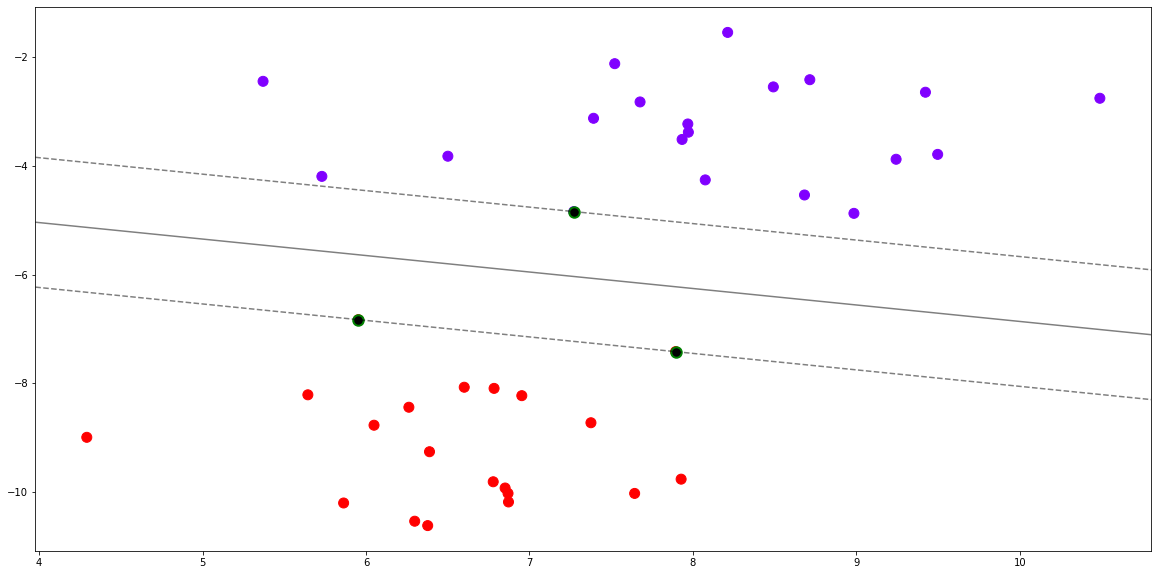

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.rainbow)


# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)


xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins Lines
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=110,
           linewidth=2, facecolors='k', edgecolors='g')
plt.show()